## Importing Libraries Loading Datase 

In [699]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import scipy.stats as stats

In [564]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin1')
df.head(10)

Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
7                      .in for Motion  (2008)   59 min   
8                  ?: A Question Mark  (2012)   82 min   
9                            @Andheri  (2014)  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Drama     NaN    NaN        Amol Palekar   
5     Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6        Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                Documentary     NaN    NaN       Anirban Datta   
8  Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9    Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   

           Actor 1                 Actor 2          Actor 3  
0         Manmauji                  Birbal  Rajendra Bhatia  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
2     Sayani Gupta       Plabita Borthakur       Roy Angana  
3          Prateik              Ishita Raj  Siddhant Kapoor  
4     Rajat Kapoor      Rituparna Sengupta      Antara Mali  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
7              NaN                     NaN              NaN  
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9        Augustine            Fathima Babu             Byon

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [567]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [568]:
df.describe()


Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

## Getting Information about Nan /  Missing Values

In [566]:
print("unique count")
print(df.nunique())
print("Null count")
df.isnull().sum()

unique count
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64
Null count


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [569]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%

<Axes: >

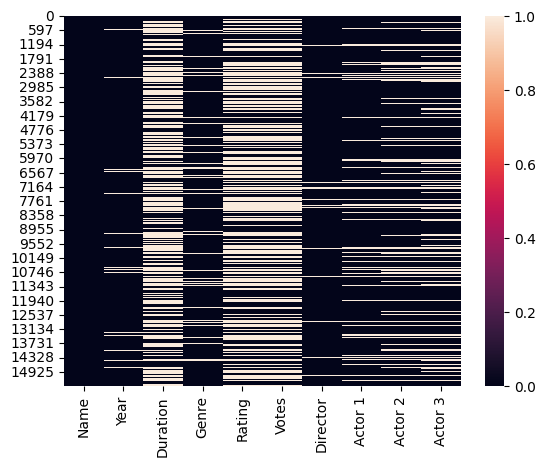

In [570]:
sns.heatmap(df.isnull())

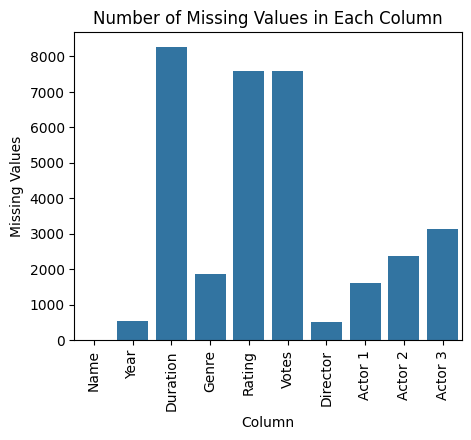

In [571]:
missing_values = df.isnull().sum()

# Convert the Series to a DataFrame for plotting
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

# Plot using seaborn's barplot
plt.figure(figsize=(5, 4))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df)
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title('Number of Missing Values in Each Column')
plt.show()

In [572]:
df['Rating'].fillna(df['Rating'].mean())

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

## Correcting Data Formte of Columns

In [573]:
df=df.dropna(subset=['Year'],axis=0)
df['Year'].head()
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')', '', regex=False).astype(int)

df.head()

Name  Year Duration                   Genre  \
1  #Gadhvi (He thought he was Gandhi)  2019  109 min                   Drama   
2                         #Homecoming  2021   90 min          Drama, Musical   
3                             #Yaaram  2019  110 min         Comedy, Romance   
4                   ...And Once Again  2010  105 min                   Drama   
5                ...Aur Pyaar Ho Gaya  1997  147 min  Comedy, Drama, Musical   

   Rating Votes            Director       Actor 1                 Actor 2  \
1     7.0     8       Gaurav Bakshi  Rasika Dugal          Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta       Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik              Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor      Rituparna Sengupta   
5     4.7   827        Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan   

           Actor 3  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali  
5    Shammi Kapoor

In [574]:
result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration            7866     52.51%
Genre               1841     12.29%
Rating              7062     47.14%
Votes               7061     47.13%
Director             497      3.32%
Actor 1             1488      9.93%
Actor 2             2197     14.67%
Actor 3             2907      19.4%

In [575]:
df['Duration'] = df['Duration'].fillna('0').astype(str)

    # Remove ' min' from 'Duration'
df['Duration'] = df['Duration'].str.replace(' min', '')

    # Convert 'Duration' to integers
df['Duration'] = df['Duration'].astype(int)


## Filling the NAN values in Duration Column with the best Values 

In [576]:
print(max(df['Duration']))
print(min(df['Duration']))
print(np.mean(df['Duration']))
print(max(df['Duration']))

321
0
61.0137507509512
321


<Axes: xlabel='Duration'>

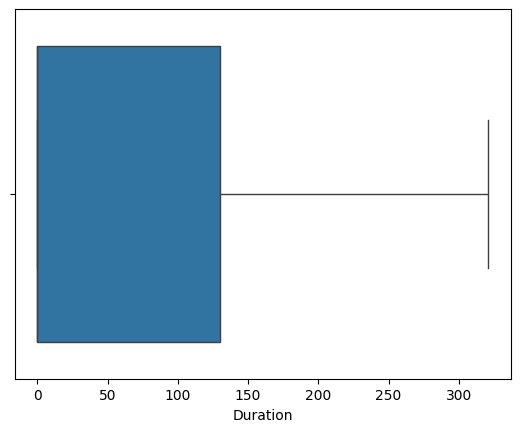

In [577]:
df['Duration']=df['Duration'].astype(int)
sns.boxplot(x=df['Duration'])


### Duration mainly depends on Genre , Actors name and Director

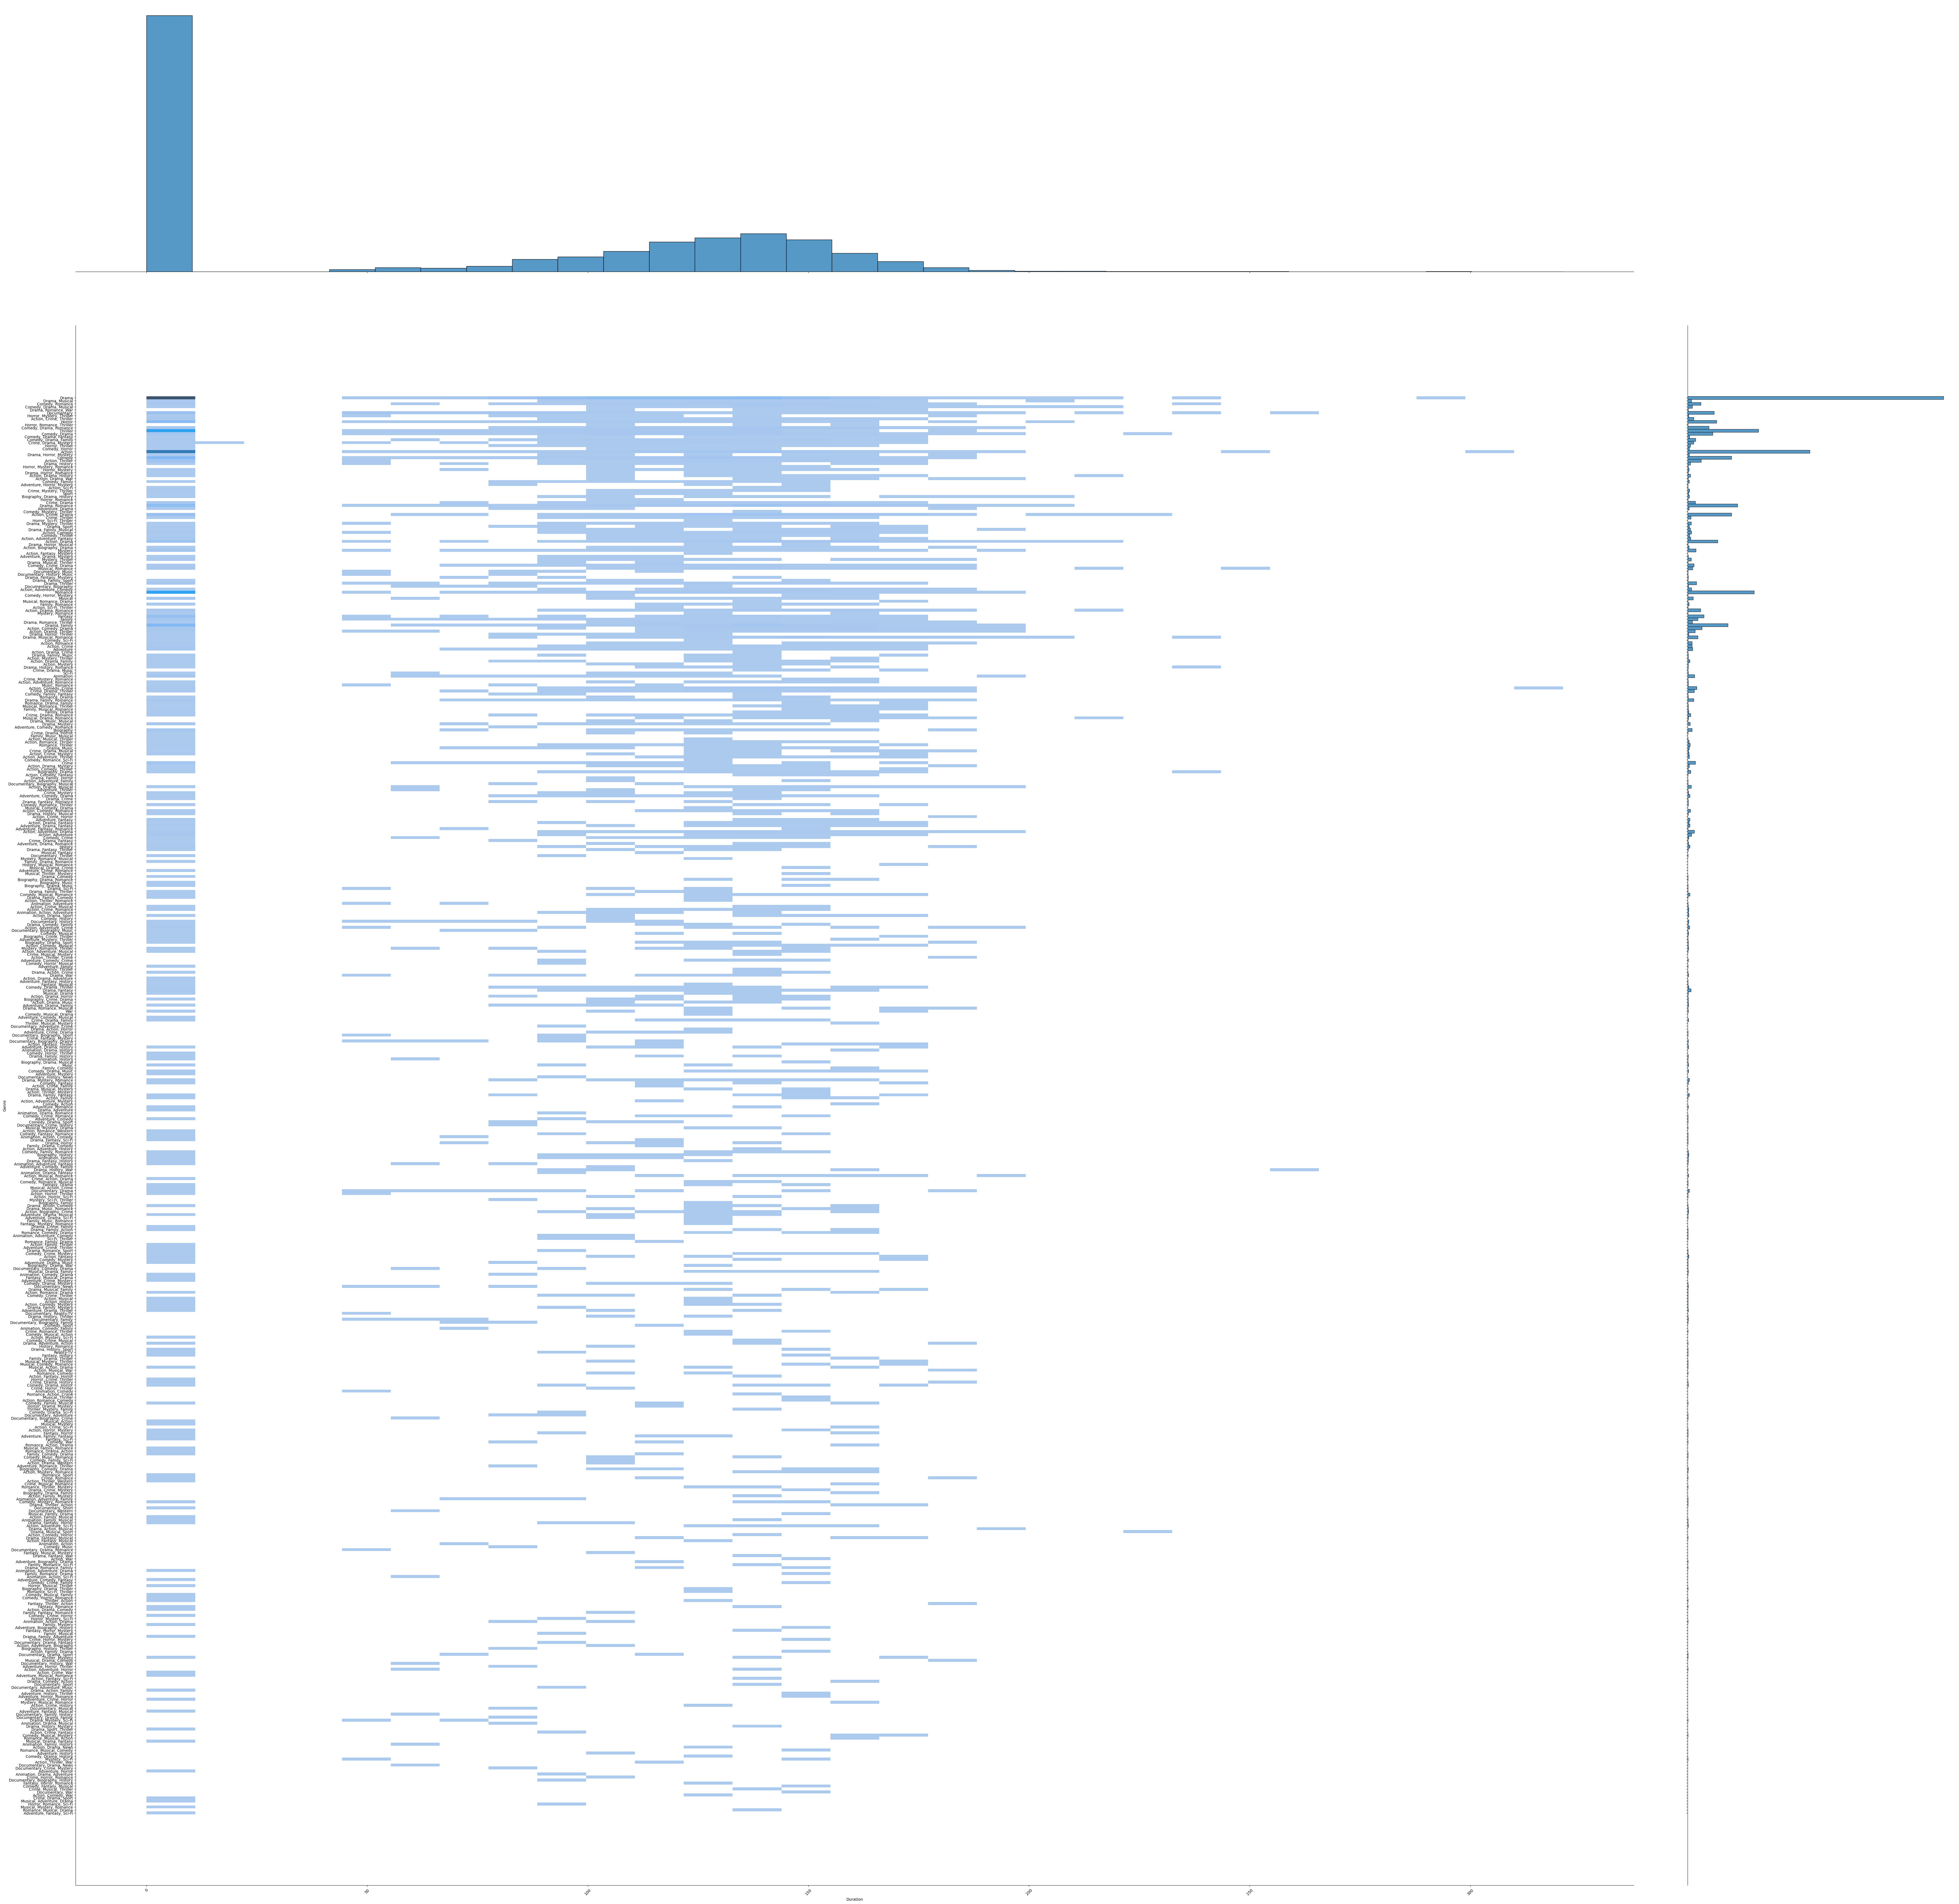

In [578]:
# plt.figure(figsize=(106, 10))
sns.jointplot(data=df, y='Genre', x='Duration',height=69,dropna=True,kind='hist')
plt.xticks(rotation=45)
plt.show()

### Filling Nan values of Duration by Relating with Genre ,Actor and Director

In [579]:
median_duration_by_genre = df.groupby('Genre')['Duration'].median()

# Display median duration by genre
print("\nMedian duration by genre:")
print(median_duration_by_genre)

# Debug: Print rows with Duration == 0 before replacement
print("\nRows with Duration == 0 before replacement:")
print(df[df['Duration'] == 0])

# Replace Duration == 0 with median duration by genre inplace
for genre, median_duration in median_duration_by_genre.items():
    df.loc[(df['Duration'] == 0) & (df['Genre'] == genre), 'Duration'] = median_duration

# Debug: Print rows with Duration == 0 after replacement
print("\nRows with Duration == 0 after replacement:")
print(df['Duration'].value_counts())


Median duration by genre:
Genre
Action                            0.0
Action, Adventure                 0.0
Action, Adventure, Biography    100.0
Action, Adventure, Comedy       141.0
Action, Adventure, Crime         93.0
                                ...  
Thriller, Action                 64.5
Thriller, Musical, Mystery      158.0
Thriller, Mystery               139.0
Thriller, Mystery, Family       142.0
War                             100.0
Name: Duration, Length: 474, dtype: float64

Rows with Duration == 0 before replacement:
                      Name  Year  Duration                   Genre  Rating  \
14              101 Ratein  1990         0                Thriller     NaN   
17         108 Teerthyatra  1987         0  Comedy, Drama, Fantasy     NaN   
19              11 O'Clock  1948         0                     NaN     NaN   
20              12 Bulbule  2021         0   Comedy, Drama, Family     NaN   
24                    124a  2021         0             Documentary    

C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\3399968982.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.




Rows with Duration == 0 after replacement:
Duration
0.0      6258
135.0     299
120.0     282
121.0     243
57.0      235
         ... 
298.0       1
217.0       1
64.5        1
250.0       1
141.5       1
Name: count, Length: 213, dtype: int64


In [580]:

median_duration_by_director = df.groupby('Director')['Duration'].median()

# Replace Duration == 0 with median duration by Director inplace
for director, median_duration in median_duration_by_director.items():
    df.loc[(df['Duration'] == 0) & (df['Director'] == director), 'Duration'] = median_duration

print("\nCount of each Duration value:")
print(df['Duration'].value_counts())


Count of each Duration value:
Duration
0.0      5002
135.0     345
120.0     307
121.0     292
133.0     257
         ... 
217.0       1
40.0        1
250.0       1
76.5        1
29.0        1
Name: count, Length: 295, dtype: int64


In [581]:
actors=['Actor 1','Actor 2',  'Actor 3']
for actor in actors:
    median_duration_by_actor = df.groupby(actor)['Duration'].median()

    for act, median_duration in median_duration_by_actor.items():
        df.loc[(df['Duration'] == 0) & (df[actor] == act), 'Duration'] = median_duration
    print(f"\nCount of each Duration value: when grouping by {actor}")
    print(df['Duration'].value_counts())


    



Count of each Duration value: when grouping by Actor 1
Duration
0.00      3893
135.00     368
120.00     328
133.00     315
121.00     313
          ... 
217.00       1
40.00        1
63.75        1
250.00       1
76.50        1
Name: count, Length: 346, dtype: int64

Count of each Duration value: when grouping by Actor 2
Duration
0.000      2920
135.000     381
121.000     347
120.000     342
133.000     320
           ... 
63.750        1
250.000       1
84.875        1
76.250        1
76.500        1
Name: count, Length: 391, dtype: int64

Count of each Duration value: when grouping by Actor 3
Duration
0.000      2316
121.000     405
135.000     384
120.000     344
133.000     327
           ... 
56.250        1
40.000        1
250.000       1
84.875        1
76.500        1
Name: count, Length: 432, dtype: int64


321


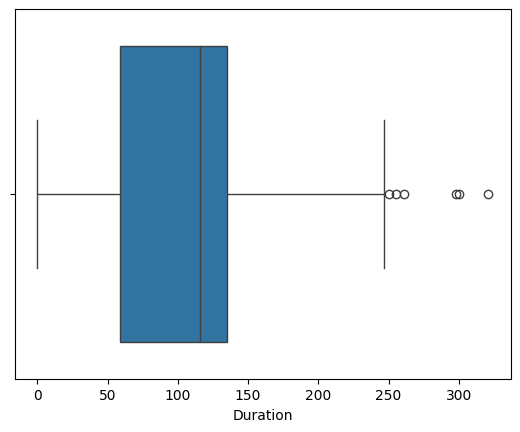

In [582]:
df['Duration']=df['Duration'].astype(int)
sns.boxplot(x=df['Duration'])
print(max(df['Duration']))

In [583]:
df=df.dropna(subset=['Duration'],axis=0)
df=df[df['Duration'] >= 60]
df.head()

Name  Year  Duration                   Genre  \
1  #Gadhvi (He thought he was Gandhi)  2019       109                   Drama   
2                         #Homecoming  2021        90          Drama, Musical   
3                             #Yaaram  2019       110         Comedy, Romance   
4                   ...And Once Again  2010       105                   Drama   
5                ...Aur Pyaar Ho Gaya  1997       147  Comedy, Drama, Musical   

   Rating Votes            Director       Actor 1                 Actor 2  \
1     7.0     8       Gaurav Bakshi  Rasika Dugal          Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta       Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik              Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor      Rituparna Sengupta   
5     4.7   827        Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan   

           Actor 3  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali  
5    Shammi Kapoor

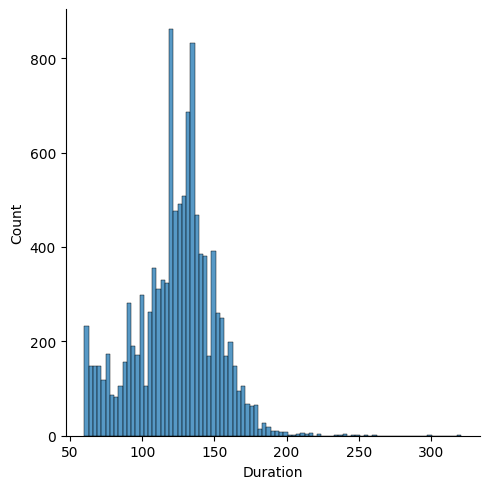

In [584]:
sns.displot(df['Duration'])

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11220 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11220 non-null  object 
 1   Year      11220 non-null  int64  
 2   Duration  11220 non-null  int64  
 3   Genre     10451 non-null  object 
 4   Rating    7525 non-null   float64
 5   Votes     7525 non-null   object 
 6   Director  11207 non-null  object 
 7   Actor 1   10912 non-null  object 
 8   Actor 2   10695 non-null  object 
 9   Actor 3   10371 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 964.2+ KB


## Checking remaining Nan Values

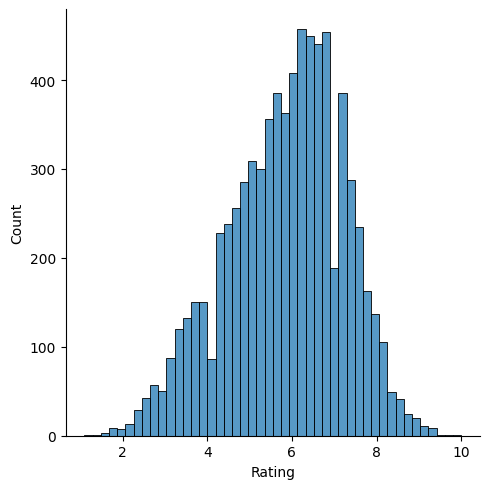

In [586]:
sns.displot(df['Rating'])


In [587]:
df=df.dropna(subset=['Rating'],axis=0)
result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                 65      0.86%
Rating                 0       0.0%
Votes                  0       0.0%
Director               1      0.01%
Actor 1               76      1.01%
Actor 2              124      1.65%
Actor 3              189      2.51%

In [588]:
df["Director"]=df["Director"].fillna('Dilip Bose')

result = missing_values_percent(df)
result

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                 65      0.86%
Rating                 0       0.0%
Votes                  0       0.0%
Director               0       0.0%
Actor 1               76      1.01%
Actor 2              124      1.65%
Actor 3              189      2.51%

## Exploding Genre column for better fitting of model and filling NAN values with mode of genre

In [589]:

df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8636\4272183703.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Name  Year  Duration    Genre  Rating Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019       109    Drama     7.0     8   
3                             #Yaaram  2019       110   Comedy     4.4    35   
3                             #Yaaram  2019       110  Romance     4.4    35   
5                ...Aur Pyaar Ho Gaya  1997       147   Comedy     4.7   827   
5                ...Aur Pyaar Ho Gaya  1997       147    Drama     4.7   827   

        Director       Actor 1                 Actor 2          Actor 3  
1  Gaurav Bakshi  Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
3     Ovais Khan       Prateik              Ishita Raj  Siddhant Kapoor  
5   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5   Rahul Rawail    Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor

In [590]:
df=df.dropna(subset=['Actor 1','Actor 2','Actor 3'],axis=0)
result = missing_values_percent(df)
result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15074 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15074 non-null  object 
 1   Year      15074 non-null  int64  
 2   Duration  15074 non-null  int64  
 3   Genre     15074 non-null  object 
 4   Rating    15074 non-null  float64
 5   Votes     15074 non-null  object 
 6   Director  15074 non-null  object 
 7   Actor 1   15074 non-null  object 
 8   Actor 2   15074 non-null  object 
 9   Actor 3   15074 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.3+ MB


## Correcting Votes Column

In [591]:

df['Votes'] = df['Votes'].str.replace(',', '', regex=False).astype(int)

In [592]:
df.head(10)

Name  Year  Duration    Genre  Rating  Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019       109    Drama     7.0      8   
3                             #Yaaram  2019       110   Comedy     4.4     35   
3                             #Yaaram  2019       110  Romance     4.4     35   
5                ...Aur Pyaar Ho Gaya  1997       147   Comedy     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997       147    Drama     4.7    827   
5                ...Aur Pyaar Ho Gaya  1997       147  Musical     4.7    827   
6                           ...Yahaan  2005       142    Drama     7.4   1086   
6                           ...Yahaan  2005       142  Romance     7.4   1086   
6                           ...Yahaan  2005       142      War     7.4   1086   
8                  ?: A Question Mark  2012        82   Horror     5.6    326   

         Director          Actor 1                 Actor 2          Actor 3  
1   Gaurav Bakshi     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3      Ovais Khan          Prateik              Ishita Raj  Siddhant Kapoor  
3      Ovais Khan          Prateik              Ishita Raj  Siddhant Kapoor  
5    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5    Rahul Rawail       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
6  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
6  Shoojit Sircar  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
8   Allyson Patel        Yash Dave          Muntazir Ahmad     Kiran Bhatia

## Visualising the relationship b/w different columns


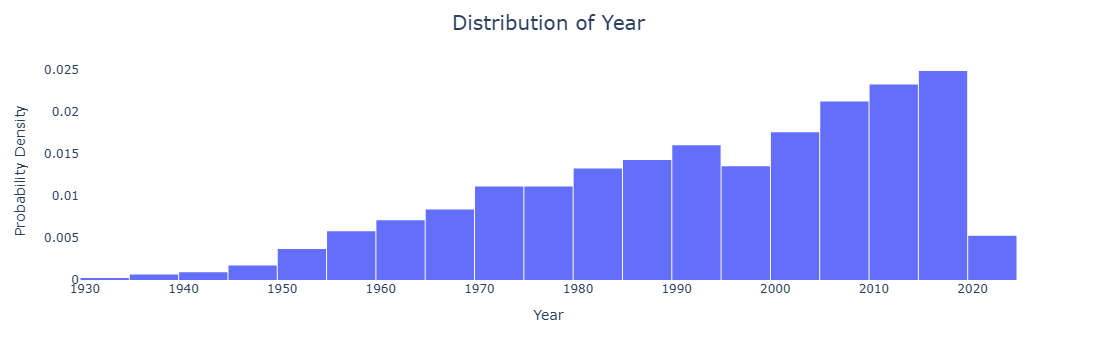

In [593]:



fig_year = px.histogram(df, x='Year', histnorm='probability density', nbins=30)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(
    title='Distribution of Year',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor='white'
)

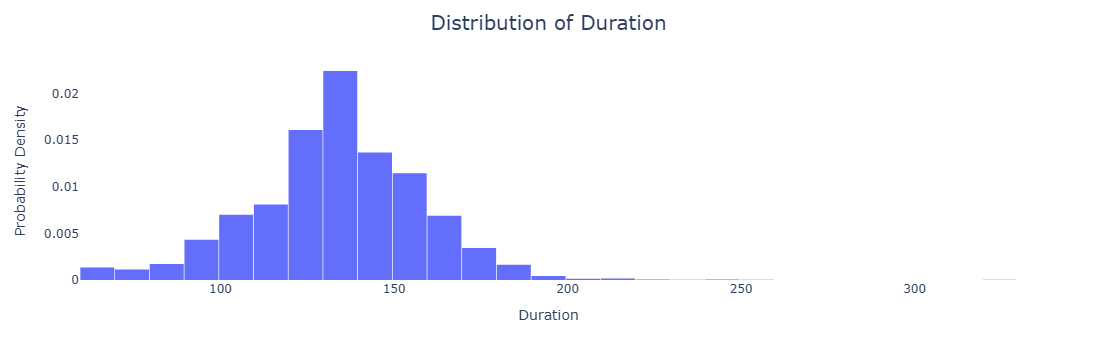

In [594]:
fig_dur = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40)
fig_dur.update_traces(selector=dict(type='histogram'))
fig_dur.update_layout(
    title='Distribution of Duration', 
    title_x=0.5, title_pad=dict(t=20),
    title_font=dict(size=20), xaxis_title='Duration',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False),
    bargap=0.02, 
    plot_bgcolor = 'white')
fig_dur.show()

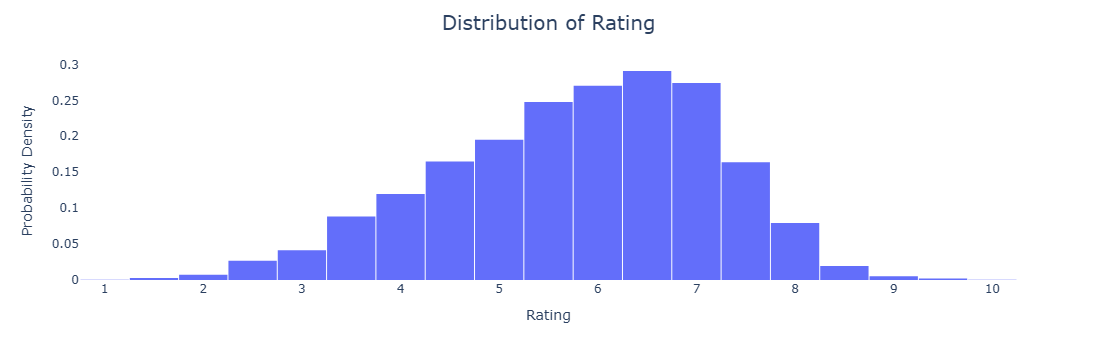

In [595]:
fig_rat = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 40)
fig_rat.update_traces(selector=dict(type='histogram'))
fig_rat.update_layout(title='Distribution of Rating', 
                      title_x=0.5, 
                      title_pad=dict(t=20),
                      title_font=dict(size=20),
                      xaxis_title='Rating',
                      yaxis_title='Probability Density',
                      xaxis=dict(showgrid=False),
                      yaxis=dict(showgrid=False),
                      bargap=0.02,
                      plot_bgcolor = 'white')
fig_rat.show()

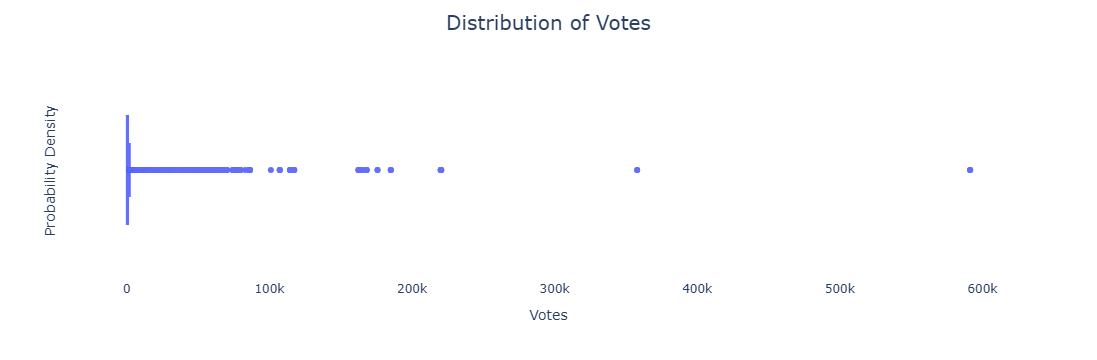

In [596]:
fig_vot = px.box(df, x = 'Votes')
fig_vot.update_layout(title='Distribution of Votes', 
                        title_x=0.5,
                        title_pad=dict(t=20), 
                        title_font=dict(size=20),
                        xaxis_title='Votes',
                        yaxis_title='Probability Density', 
                        xaxis=dict(showgrid=False), 
                        yaxis=dict(showgrid=False), 
                        plot_bgcolor = 'white')
fig_vot.show()

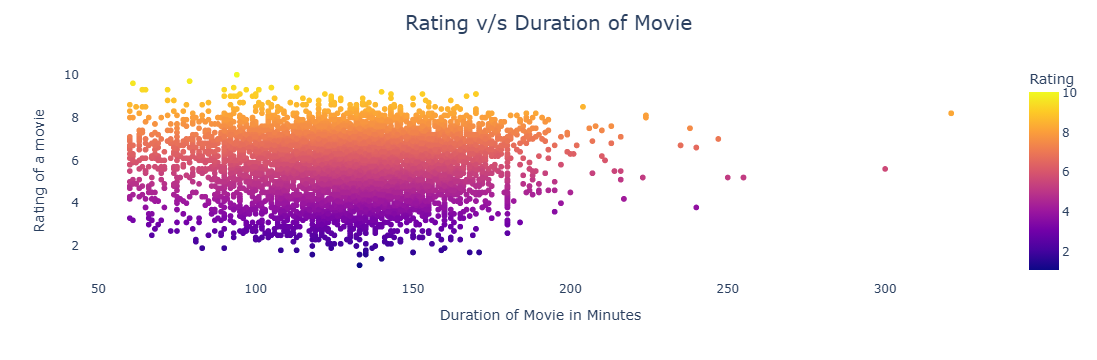

In [597]:
rel_dur_rat = px.scatter(df, x = 'Duration', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Duration of Movie',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Duration of Movie in Minutes',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

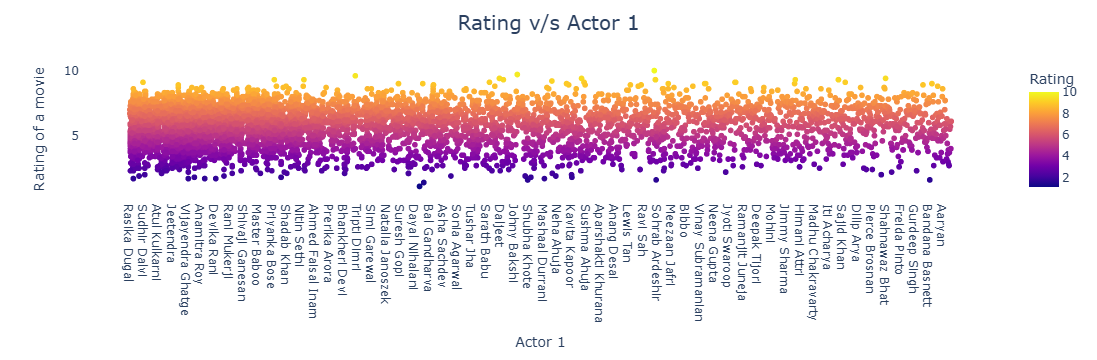

In [598]:
rel_dur_rat = px.scatter(df, x = 'Actor 1', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 1',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 1',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

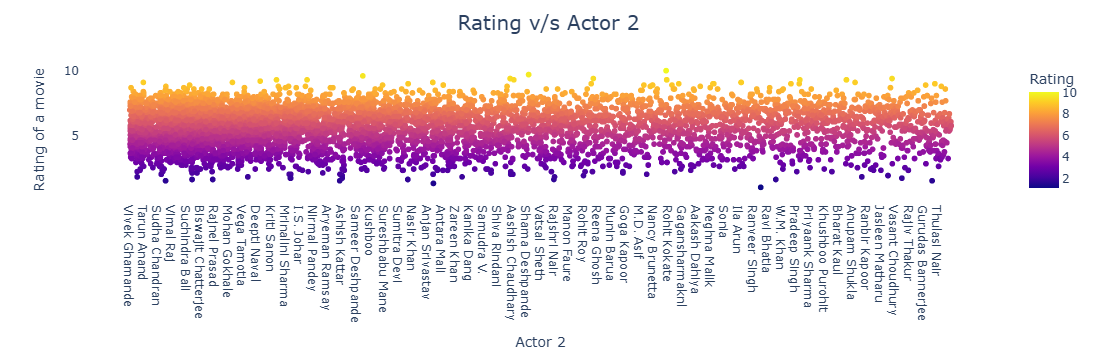

In [599]:
rel_dur_rat = px.scatter(df, x = 'Actor 2', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 2',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 2',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

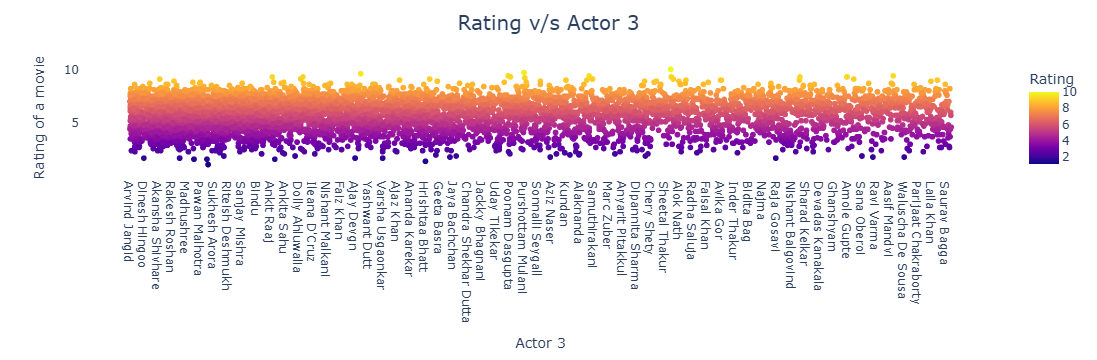

In [600]:
rel_dur_rat = px.scatter(df, x = 'Actor 3', y = 'Rating', color = "Rating")
rel_dur_rat.update_layout(title='Rating v/s Actor 3',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis_title='Actor 3',
                          yaxis_title='Rating of a movie',
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

In [1]:
fig_rat_votes = px.scatter(df, x = 'Rating', y = 'Votes', color = "Votes")
fig_rat_votes.update_layout(title='Getting Look at  Ratings impact on Votes ',
                            title_x=0.5, 
                            title_pad=dict(t=20), 
                            title_font=dict(size=20), 
                            xaxis_title='Ratings of Movies', 
                            yaxis_title='Votes of movies', 
                            xaxis=dict(showgrid=False), 
                            yaxis=dict(showgrid=False),
                            plot_bgcolor = 'white')
fig_rat_votes.show()


NameError: name 'px' is not defined

In [602]:
df.drop('Name', axis = 1, inplace = True)

In [603]:

g_mean_rat = df.groupby('Genre')['Rating'].transform('mean')
df['G_mean_rat'] = g_mean_rat

dir_mean_rat = df.groupby('Director')['Rating'].transform('mean')
df['Dir_enc'] = dir_mean_rat

a1_mean_rat = df.groupby('Actor 1')['Rating'].transform('mean')
df['A1_enc'] = a1_mean_rat

a2_mean_rat = df.groupby('Actor 2')['Rating'].transform('mean')
df['A2_enc'] = a2_mean_rat

a3_mean_rat = df.groupby('Actor 3')['Rating'].transform('mean')
df['A3_enc'] = a3_mean_rat

In [604]:
df.head(10)

Year  Duration    Genre  Rating  Votes        Director          Actor 1  \
1  2019       109    Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3  2019       110   Comedy     4.4     35      Ovais Khan          Prateik   
3  2019       110  Romance     4.4     35      Ovais Khan          Prateik   
5  1997       147   Comedy     4.7    827    Rahul Rawail       Bobby Deol   
5  1997       147    Drama     4.7    827    Rahul Rawail       Bobby Deol   
5  1997       147  Musical     4.7    827    Rahul Rawail       Bobby Deol   
6  2005       142    Drama     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
6  2005       142  Romance     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
6  2005       142      War     7.4   1086  Shoojit Sircar  Jimmy Sheirgill   
8  2012        82   Horror     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  G_mean_rat   Dir_enc    A1_enc  \
1          Vivek Ghamande    Arvind Jangid    5.987941  7.000000  6.850000   
3              Ishita Raj  Siddhant Kapoor    5.726592  4.400000  5.250000   
3              Ishita Raj  Siddhant Kapoor    5.749141  4.400000  5.250000   
5  Aishwarya Rai Bachchan    Shammi Kapoor    5.726592  5.342105  4.793617   
5  Aishwarya Rai Bachchan    Shammi Kapoor    5.987941  5.342105  4.793617   
5  Aishwarya Rai Bachchan    Shammi Kapoor    6.167078  5.342105  4.793617   
6          Minissha Lamba   Yashpal Sharma    5.987941  7.547059  5.322951   
6          Minissha Lamba   Yashpal Sharma    5.749141  7.547059  5.322951   
6          Minissha Lamba   Yashpal Sharma    5.981818  7.547059  5.322951   
8          Muntazir Ahmad     Kiran Bhatia    4.776562  5.600000  5.600000   

   A2_enc    A3_enc  
1  7.0000  7.000000  
3  4.4000  4.460000  
3  4.4000  4.460000  
5  5.7300  5.930000  
5  5.7300  5.930000  
5  5.7300  5.930000  
6  5.8000  6.671429  
6  5.8000  6.671429  
6  5.8000  6.671429  
8  5.8125  5.600000

## Splitng Data

In [606]:
X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y = df['Rating']
print(X.shape)
print(y.shape)

(15074, 8)
(15074,)


In [721]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.info()

(13566, 8)
(13566,)
(1508, 8)
(1508,)
<class 'pandas.core.frame.DataFrame'>
Index: 13566 entries, 7839 to 7320
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        13566 non-null  int64  
 1   Votes       13566 non-null  int64  
 2   Duration    13566 non-null  int64  
 3   G_mean_rat  13566 non-null  float64
 4   Dir_enc     13566 non-null  float64
 5   A1_enc      13566 non-null  float64
 6   A2_enc      13566 non-null  float64
 7   A3_enc      13566 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 953.9 KB


## Models Used :
 - ## Linear Regression
 - ## decision Tree Regressor
 - ## Random Forest Regressor
## Techniques used for Varification Of data 
 - ## R2 Score
 - ## K-Fold cross-
 - ## Mean squared error
 - ## Mean absolute error:

## Applying Linear Regression  and Predicting

In [745]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

### Using R2 score and K-fold cross-validation for prediction of result 

In [768]:
print('The performance evaluation of Linear Regression is below:')
print('Mean squared error:', metrics.mean_squared_error(y_test, lr_pred))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, lr_pred))
print('R2 score:', metrics.r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

# Perform 5-fold cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X, y, cv=8, scoring='r2')
print('Linear Regression 5-fold cross-validation R2 scores:', cv_scores_lr)
print('Mean R2 score:', cv_scores_lr.mean())

The performance evaluation of Linear Regression is below:
Mean squared error: 0.4140951393205695
Mean absolute error: 0.47974855335269573
R2 score: 0.758133677132174


Linear Regression 5-fold cross-validation R2 scores: [0.74580968 0.7178191  0.75935159 0.7381327  0.76971803 0.74521424
 0.71236289 0.7704389 ]
Mean R2 score: 0.7448558901375664


## Applying  Decision Tree Regressor  and Predicting

In [747]:
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

### Using R2 score and K-fold cross-validation for prediction of result

In [767]:
print('The performance evaluation of Decision Tree Regressor is below:')
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

# Perform 5-fold cross-validation for Decision Tree Regressor
cv_scores_dt = cross_val_score(dt_regressor, X, y, cv=8, scoring='r2')
print('\nDecision Tree Regressor 5-fold cross-validation R2 scores:', cv_scores_dt)
print('Mean R2 score:', cv_scores_dt.mean())

The performance evaluation of Decision Tree Regressor is below:
Mean squared error: 0.09157824933687002
Mean absolute error: 0.09031830238726801
R2 score: 0.9465106147874037

Decision Tree Regressor 5-fold cross-validation R2 scores: [0.51989674 0.53861423 0.55166213 0.56860252 0.59365443 0.55561806
 0.55839896 0.60298134]
Mean R2 score: 0.5611785495019856


## Applying Random Forest Regressor and Predicting

In [749]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

### Using R2 score and K-fold cross-validation for prediction of result


In [766]:
print('The performance evaluation of Random Forest Regressor is below:')
print('Mean squared error:', metrics.mean_squared_error(y_test, rf_pred))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, rf_pred))
print('R2 score:', metrics.r2_score(y_test, rf_pred))

# Perform 5-fold cross-validation for Random Forest Regressor
cv_scores_rf = cross_val_score(rf, X, y, cv=8, scoring='r2')
print('\nRandom Forest Regressor 5-fold cross-validation R2 scores:', cv_scores_rf)
print('Mean R2 score:', cv_scores_rf.mean())

The performance evaluation of Random Forest Regressor is below:
Mean squared error: 0.07911619562334218
Mean absolute error: 0.16180305039787796
R2 score: 0.9537895002918745

Random Forest Regressor 5-fold cross-validation R2 scores: [0.7868755  0.75037461 0.78976913 0.79667421 0.82415044 0.79529224
 0.7459251  0.81403324]
Mean R2 score: 0.7878868087700488


## Standardization  Of Data 

In [605]:
Featured_df = df.copy()
Featured_df.to_csv('Featured_df.csv', index=False)

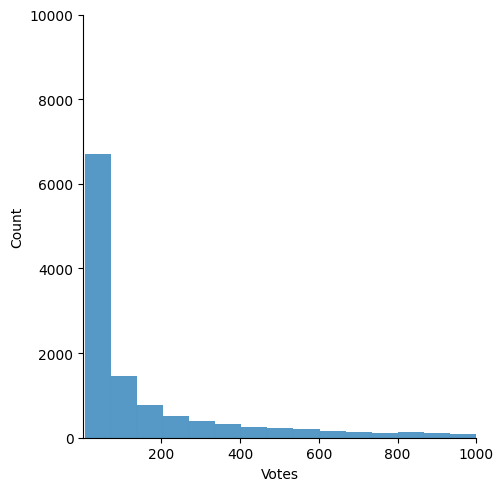

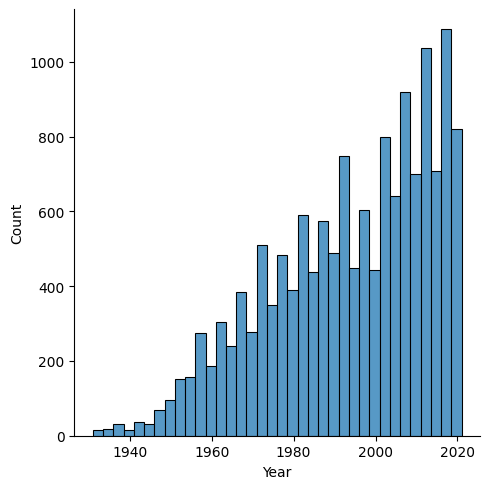

In [619]:
sns.displot(df['Votes'])
plt.xlim(1, 1000)  
plt.ylim(0, 10000) 
plt.show()
sns.displot(df['Year'])

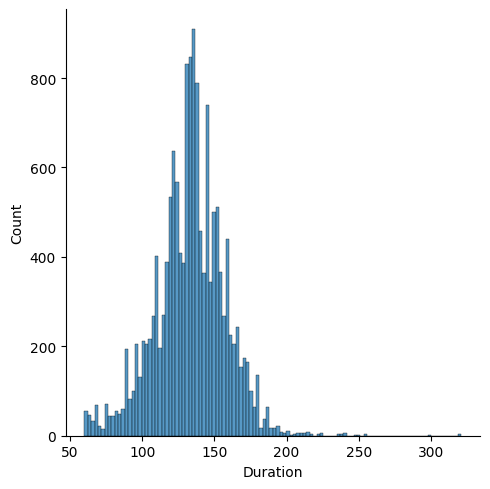

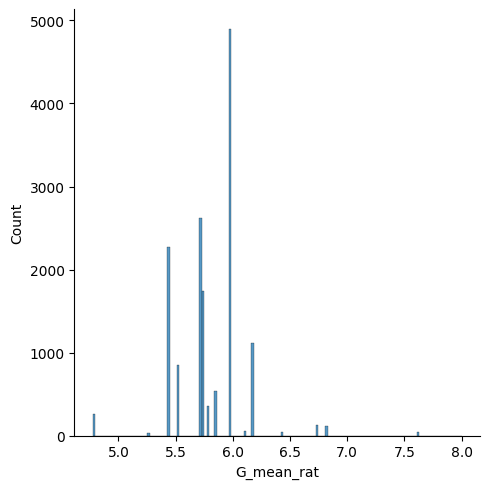

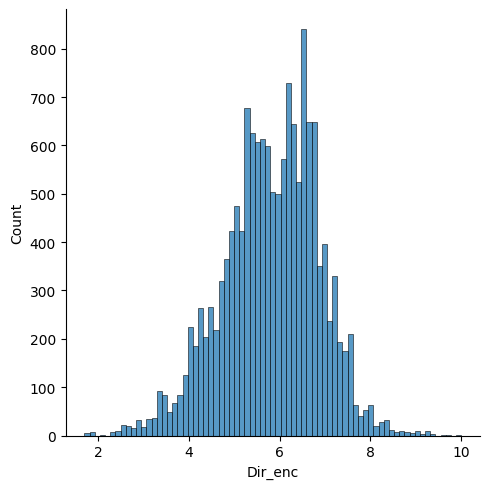

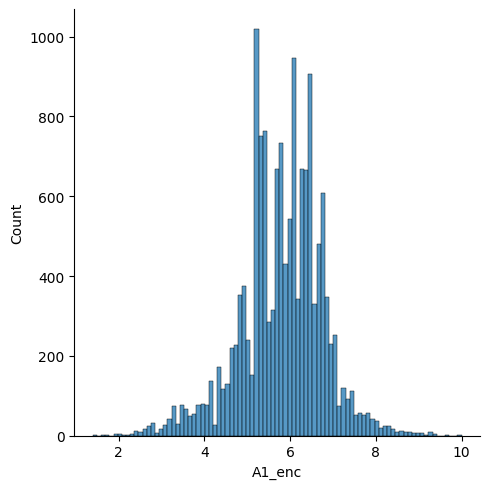

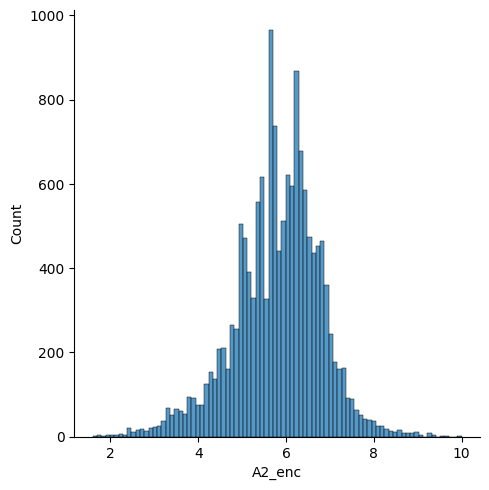

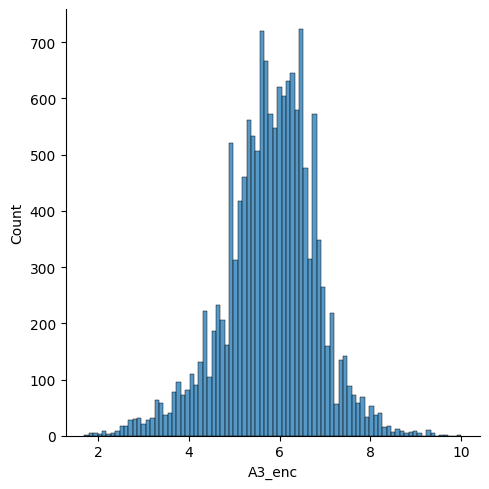

In [618]:
xol=[ 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']
for x in xol:
    sns.displot(df[x])

### Applying mean normalization on data which have Gaussion Distribtion and Min max Scaler on other which dont have so as to protect their relation with output

In [624]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[['Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']])
std_df=pd.DataFrame(columns=[ 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc'],data=x_scaled)
minmax=MinMaxScaler()
x_minmax=minmax.fit_transform(df[['Year','Votes']])
minmax_df = pd.DataFrame(data=x_minmax, columns=['Year', 'Votes'])
scaled_df = pd.concat([std_df, minmax_df], axis=1)
scaled_df.head()

Duration  G_mean_rat   Dir_enc    A1_enc    A2_enc    A3_enc      Year  \
0 -0.992384    0.599667  1.129951  1.070762  1.204433  1.186219  0.977778   
1 -0.951469   -0.260612 -1.330095 -0.569883 -1.417770 -1.336731  0.977778   
2 -0.951469   -0.186389 -1.330095 -0.569883 -1.417770 -1.336731  0.977778   
3  0.562401   -0.260612 -0.438702 -1.037860 -0.076412  0.123401  0.733333   
4  0.562401    0.599667 -0.438702 -1.037860 -0.076412  0.123401  0.733333   

      Votes  
0  0.000005  
1  0.000051  
2  0.000051  
3  0.001390  
4  0.001390

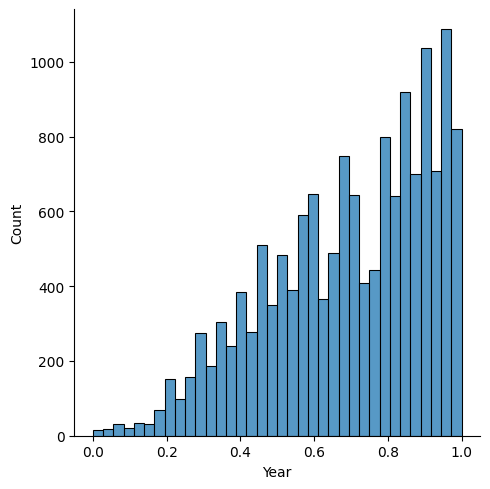

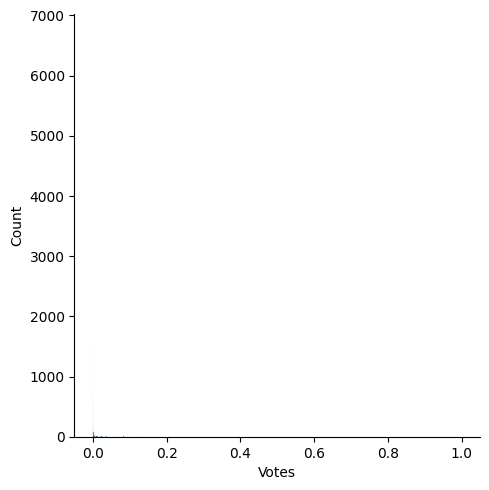

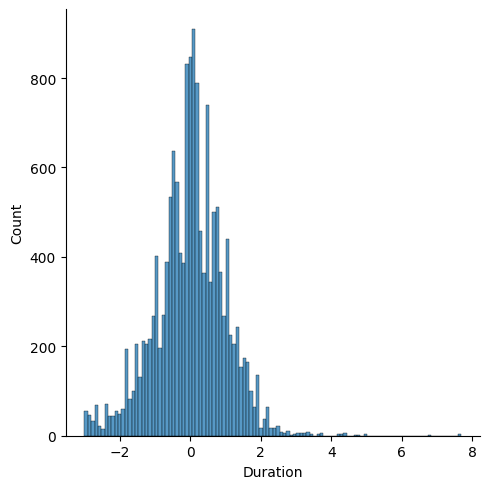

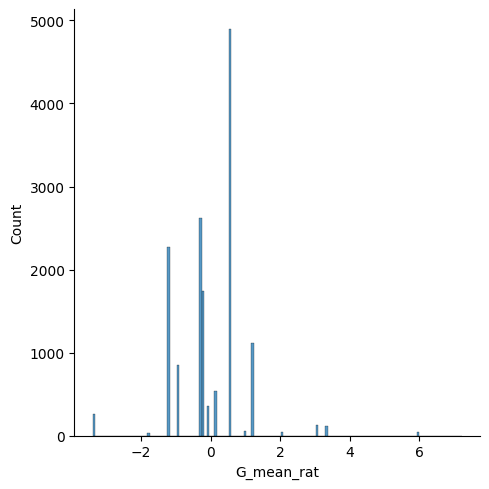

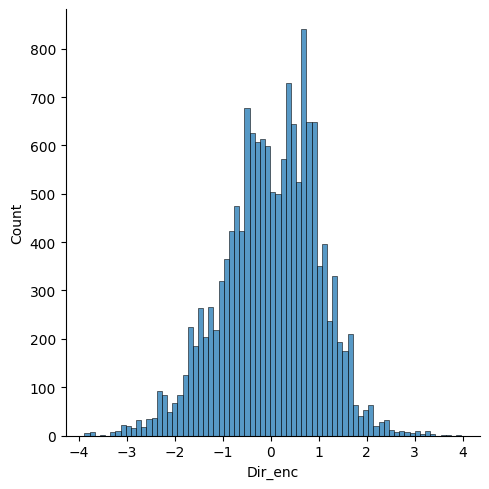

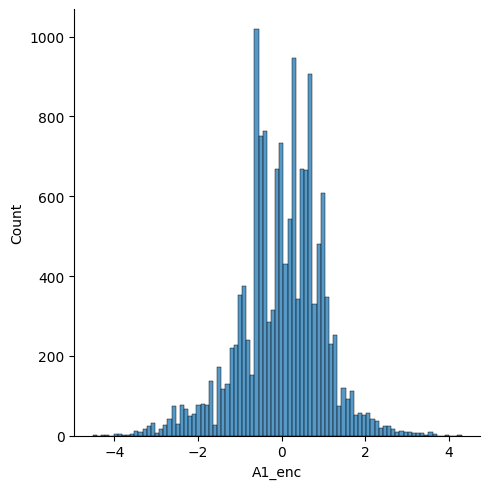

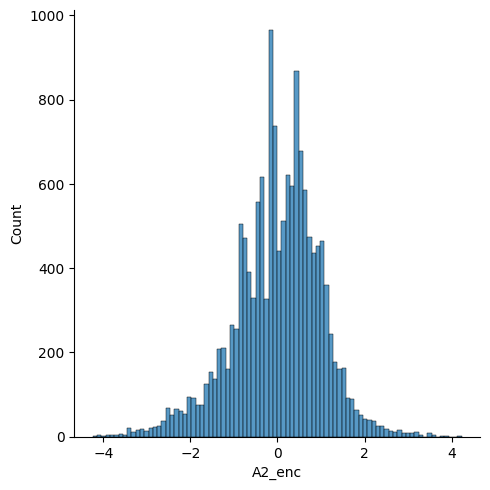

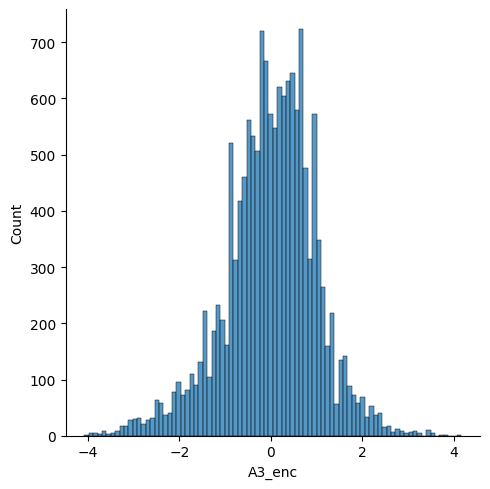

In [626]:
xol=['Year','Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']
for x in xol:
    sns.displot(scaled_df[x])

In [ ]:
X = df[['Year', 'Votes', 'Duration', 'G_mean_rat', 'Dir_enc', 'A1_enc', 'A2_enc', 'A3_enc']]
y=df['Rating']

In [714]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.info()

(13566, 8)
(13566,)
(1508, 8)
(1508,)
<class 'pandas.core.frame.DataFrame'>
Index: 13566 entries, 7839 to 7320
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        13566 non-null  int64  
 1   Votes       13566 non-null  int64  
 2   Duration    13566 non-null  int64  
 3   G_mean_rat  13566 non-null  float64
 4   Dir_enc     13566 non-null  float64
 5   A1_enc      13566 non-null  float64
 6   A2_enc      13566 non-null  float64
 7   A3_enc      13566 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 953.9 KB


## Applying Linear Regression and Predicting

In [763]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

### Using R2 score and K-fold cross-validation for prediction of result

In [764]:
print('The performance evaluation of Linear Regression is below:')
print('Mean squared error:', metrics.mean_squared_error(y_test, lr_pred))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, lr_pred))
print('R2 score:', metrics.r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

# Perform 5-fold cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X, y, cv=8, scoring='r2')
print('Linear Regression 5-fold cross-validation R2 scores:', cv_scores_lr)
print('Mean R2 score:', cv_scores_lr.mean())

The performance evaluation of Linear Regression is below:
Mean squared error: 0.4140951393205695
Mean absolute error: 0.47974855335269573
R2 score: 0.758133677132174


Linear Regression 5-fold cross-validation R2 scores: [0.74580968 0.7178191  0.75935159 0.7381327  0.76971803 0.74521424
 0.71236289 0.7704389 ]
Mean R2 score: 0.7448558901375664


## Applying Decision Tree Regressor and Predicting


In [754]:
dt_regressor = DecisionTreeRegressor(random_state=2)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)


### Using R2 score and K-fold cross-validation for prediction of result

In [765]:
print('The performance evaluation of Decision Tree Regressor is below: ', '\n')
print('Mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score: ', metrics.r2_score(y_test, y_pred))
cv_scores_dt = cross_val_score(dt_regressor, X, y, cv=8, scoring='r2')
print('\nDecision Tree Regressor 5-fold cross-validation R2 scores:', cv_scores_dt)
print('Mean R2 score:', cv_scores_dt.mean())

The performance evaluation of Decision Tree Regressor is below:  

Mean squared error:  0.09157824933687002
Mean absolute error:  0.09031830238726801
R2 score:  0.9465106147874037

Decision Tree Regressor 5-fold cross-validation R2 scores: [0.51989674 0.53861423 0.55166213 0.56860252 0.59365443 0.55561806
 0.55839896 0.60298134]
Mean R2 score: 0.5611785495019856


## Applying Random Forest Regressor and Predicting


In [751]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

### Using R2 score and K-fold cross-validation for prediction result

In [ ]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',metrics.mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, rf_pred))
print('R2 score: ',metrics.r2_score(y_test, rf_pred))
cv_scores_rf = cross_val_score(rf, X, y, cv=8, scoring='r2')
print('\nRandom Forest Regressor 5-fold cross-validation R2 scores:', cv_scores_rf)
print('Mean R2 score:', cv_scores_rf.mean())

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.07911619562334218
Mean absolute error:  0.16180305039787796
R2 score:  0.9537895002918745


## Conclusion 
- **Random Forest Regressor:** Best performance with the lowest MSE (0.079) and highest R² (0.954).
- **Decision Tree Regressor:** Good performance with MSE of 0.092 and R² of 0.947, but cross-validation shows variability.
- **Linear Regression:** Lowest performance with MSE of 0.414 and R² of 0.758, though consistent cross-validation scores.

Standardization did not significantly impact the results. The Random Forest Regressor is the recommended model for its superior and consistent performance.

In [3]:
### Thanks